<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Calculus for Machine Learning(Derivatives)

**Introduction to Derivatives and their Role in Optimization**

- What are Derivatives?

  - Measures the rate at which a Function changes with respect to it's input

  - For a Function f(x), the derivative f'(x) indicates the slope of the tangent line at a point x
- Roles in Optimization

- Common Derivatives

  - for f(x) = x^2, f'(x) = 2x

  - for f(x) = sin(x), f'(x) = cos(x)

**Partial Derivatives**
- Partial Derivatives

  - Measures how a Function changes with respect to one variable while keeping other variables constant

  - for f(x, y) = x^2 + y^2, the partial derivatives are:

$\frac{\partial f}{\partial x} = 2x$

$\frac{\partial f}{\partial y} = 2y$



**Gradients**

- Gradients

  - Vector of all partial derivatives, indicating the direction of the steepest ascent

  - for f(x, y) = x^2 + y^2, the Gradient is:

$\nabla f = \left( \frac{\partial f}{\partial x} , \frac{\partial f}{\partial y} \right)
= (2x, 2y)$

  


In [3]:
import sympy as sp
x = sp.Symbol('x')
f = x**2
# Derivative
derivative = sp.diff(f, x)
print("Derivative: \n", derivative)
# Partial Derivative
x, y = sp.symbols('x y')
f = x**2 + y**2
grad_x = sp.diff(f, x)
grad_y = sp.diff(f, y)
print("Partal Deriavtives: \n", grad_x, grad_y)

Derivative: 
 2*x
Partal Deriavtives: 
 2*x 2*y


**Gradient Descent Optimization Algorithm**

- What is Gradient Descent?

  - Iterative optimization algorithm is used to minimize a function

  - Updates parameters in the direction of the negative gradient to find the minimum

- Update Rule: $\theta = \theta - \alpha \nabla_\theta L$

  - $\theta$ : Paramters of the model
  - $\alpha$ : Learning rate(Step size)

- Why is Gradient Descent important in Machine Learning?


**Exercise 1 :- Compute Derivatives of Basic Functions**

In [4]:
import sympy as sp
# Define a function
x = sp.Symbol('x')
f = x**3 - 5*x + 7
# Compute Derivative
derivative = sp.diff(f, x)
print("Function: \n", f)
print("Derivative: \n", derivative)

Function: 
 x**3 - 5*x + 7
Derivative: 
 3*x**2 - 5


**Exercise 2 :- Compute Gradients**

In [7]:
import sympy as sp
# Define a multivariable Function
x, y = sp.symbols('x y')
f = x**2 + 3*y**2 - 4*x*y
# Compute partial derivatives
grad_x = sp.diff(f, x)
grad_y = sp.diff(f, y)
print("Function: \n", f)
print("Gradients:")
print("Grad X: \n", grad_x)
print("Grad Y: \n", grad_y)

Function: 
 x**2 - 4*x*y + 3*y**2
Gradients:
Grad X: 
 2*x - 4*y
Grad Y: 
 -4*x + 6*y


**Exercise 3 :- Implement Gradient Descent for Linear Regression**

In [10]:
import numpy as np
# Define the Gradient Descent Function
def gradient_descent(X, Y, theta, learning_rate, iterations):
  m = len(Y)
  for i in range(iterations):
    predictions = np.dot(X, theta)
    errors = predictions - Y
    gradients = (1/m) * np.dot(X.T, errors)
    theta -= learning_rate * gradients
  return theta
# Sample Data
X = np.array([[1, 1], [1, 2], [1, 3]])
y = np.array([2, 2.5, 3.5])
theta = np.array([0.1, 0.1])
learning_rate = 0.1
iteration = 1000
# Perform Gradient Descent
optimized_theta = gradient_descent(X, y, theta, learning_rate, iteration)
print("Optimized Theta: \n", optimized_theta)

Optimized Theta: 
 [1.166663   0.75000161]


**Additional Practice**
> 1.Use sympy to compute second-order derivatives(Hessian matrix)

In [11]:
import sympy as sp
# Define variables
x, y = sp.symbols('x y')
# Define function
f = x**2 + y**2
# Compute Hessian
H = sp.hessian(f, (x, y))
# Display Hessian
H

Matrix([
[2, 0],
[0, 2]])

>2. Implement Gradient Descent with multiple learning rates and convergence speeds

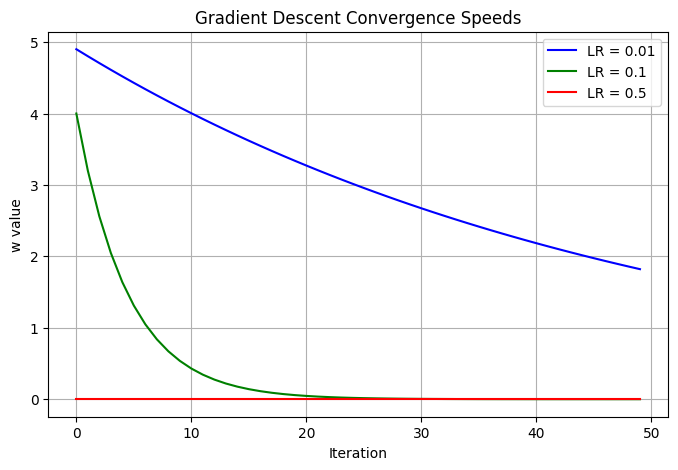

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# Function and gradient
def f(w):
    return w**2
def grad(w):
    return 2*w
# Gradient Descent function
def gradient_descent(lr, steps=50):
    w = 5  # initial value
    history = []
    for i in range(steps):
        w = w - lr * grad(w)
        history.append(w)
    return history
# Learning rates
learning_rates = [0.01, 0.1, 0.5]
colors = ['blue', 'green', 'red']
plt.figure(figsize=(8, 5))
for lr, c in zip(learning_rates, colors):
    path = gradient_descent(lr)
    plt.plot(path, label=f'LR = {lr}', color=c)
plt.xlabel('Iteration')
plt.ylabel('w value')
plt.title('Gradient Descent Convergence Speeds')
plt.legend()
plt.grid(True)
plt.show()


**Observation:**

1. LR = 0.01 → Very slow

The parameter moves slowly toward 0.

2. LR = 0.1 → Fast & stable (best)

Converges quickly.

3. LR = 0.5 → Oscillation / Not stable

Overshoots the minimum and may diverge

> 3.Visualize the Gradient Descent process on a quadratic Function

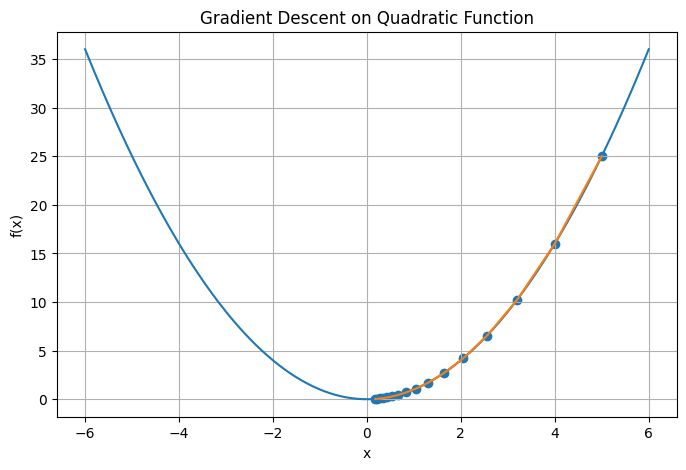

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# Quadratic function and its gradient
def f(x):
    return x**2
def grad(x):
    return 2*x
# Gradient Descent settings
lr = 0.1          # learning rate
x = 5             # starting point
history = [x]     # to store steps
# Perform gradient descent for 15 iterations
for i in range(15):
    x = x - lr * grad(x)
    history.append(x)
# Plotting
xs = np.linspace(-6, 6, 400)
ys = f(xs)
plt.figure(figsize=(8, 5))
# Plot the quadratic curve
plt.plot(xs, ys)
# Plot the descent steps
plt.scatter(history, [f(h) for h in history])
plt.plot(history, [f(h) for h in history])
# Labels and title
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent on Quadratic Function")
plt.grid(True)
plt.show()